# Hate speech

In [1]:
import pandas as pd
import numpy as np
import glob
import os
from tqdm import tqdm

In [2]:
all_files_paths = glob.glob("hate-speech-dataset/all_files/*.txt")

In [3]:
all_files_paths = [f for f in all_files_paths if os.path.isfile(f)]

In [4]:
all_files_names = [f.replace("hate-speech-dataset/all_files\\", "").replace(".txt", "") for f in all_files_paths]

In [5]:
txt_content = {}
errors = []
for name, path in tqdm(list(zip(all_files_names, all_files_paths))):
    with open(path, "r") as txt:
        try:
            txt_content[name] = txt.readline()
        except Exception as ex:
            errors.append((name, str(ex)))

100%|██████████| 10944/10944 [00:02<00:00, 3866.04it/s]


In [6]:
errors

[('13491591_4',
  "'charmap' codec can't decode byte 0x81 in position 23: character maps to <undefined>"),
 ('13493456_1',
  "'charmap' codec can't decode byte 0x81 in position 169: character maps to <undefined>"),
 ('13500400_1',
  "'charmap' codec can't decode byte 0x81 in position 67: character maps to <undefined>"),
 ('13560796_1',
  "'charmap' codec can't decode byte 0x81 in position 5: character maps to <undefined>"),
 ('13572081_1',
  "'charmap' codec can't decode byte 0x81 in position 3: character maps to <undefined>"),
 ('13588794_3',
  "'charmap' codec can't decode byte 0x81 in position 54: character maps to <undefined>"),
 ('13595072_1',
  "'charmap' codec can't decode byte 0x8d in position 75: character maps to <undefined>"),
 ('13595072_5',
  "'charmap' codec can't decode byte 0x8d in position 78: character maps to <undefined>"),
 ('14061724_1',
  "'charmap' codec can't decode byte 0x81 in position 181: character maps to <undefined>"),
 ('14065492_1',
  "'charmap' codec ca

In [7]:
errors_list = [err[0] for err in errors]

In [8]:
df = pd.DataFrame.from_dict(txt_content, orient='index').reset_index()

In [9]:
df.columns = ["file_id", "text"]

In [10]:
df.head()

,file_id,text
0,12834217_1,"As of March 13th , 2014 , the booklet had been..."
1,12834217_10,Thank you in advance. : ) Download the youtube...
2,12834217_2,In order to help increase the booklets downloa...
3,12834217_3,( Simply copy and paste the following text int...
4,12834217_4,Click below for a FREE download of a colorfull...


In [11]:
ann = pd.read_csv('hate-speech-dataset/annotations_metadata.csv')

In [12]:
ann

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate
...,...,...,...,...,...
10939,33676864_5,734541,1388,0,noHate
10940,33677019_1,735154,1388,0,noHate
10941,33677019_2,735154,1388,0,noHate
10942,33677053_1,572266,1388,0,hate


In [13]:
ann = ann[~ann['file_id'].isin(errors_list)]

In [14]:
data = pd.merge(left=ann, right=df, left_on='file_id', right_on='file_id')
data.shape
data

,file_id,user_id,subforum_id,num_contexts,label,text
0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been..."
1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...
2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...
3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...
4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...
...,...,...,...,...,...,...
10921,33676864_5,734541,1388,0,noHate,"Billy - `` That guy would n't leave me alone ,..."
10922,33677019_1,735154,1388,0,noHate,Wish we at least had a Marine Le Pen to vote f...
10923,33677019_2,735154,1388,0,noHate,Its like the choices are white genocide candid...
10924,33677053_1,572266,1388,0,hate,Why White people used to say that sex was a si...


In [15]:
data['label'] = data.apply(lambda x: 0 if x['label'] == "noHate" else 1, axis=1)

In [16]:
data

,file_id,user_id,subforum_id,num_contexts,label,text
0,12834217_1,572066,1346,0,0,"As of March 13th , 2014 , the booklet had been..."
1,12834217_2,572066,1346,0,0,In order to help increase the booklets downloa...
2,12834217_3,572066,1346,0,0,( Simply copy and paste the following text int...
3,12834217_4,572066,1346,0,1,Click below for a FREE download of a colorfull...
4,12834217_5,572066,1346,0,0,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...
...,...,...,...,...,...,...
10921,33676864_5,734541,1388,0,0,"Billy - `` That guy would n't leave me alone ,..."
10922,33677019_1,735154,1388,0,0,Wish we at least had a Marine Le Pen to vote f...
10923,33677019_2,735154,1388,0,0,Its like the choices are white genocide candid...
10924,33677053_1,572266,1388,0,1,Why White people used to say that sex was a si...


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string
import nltk.sentiment.vader as vd
from nltk import download
download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'), additional, string.punctuation)
data['text_clean'] = data['text'].str.lower()\
    .str.replace('(@[a-z0-9]+)\w+',' ')\
    .str.replace('(http\S+)', ' ')\
    .str.replace('[0-9]+(?:st| st|nd| nd|rd| rd|th| th)', '')\
    .str.replace('([^a-z \t])',' ')\
    .str.replace(' +',' ')\
    .apply(lambda x: " ".join([i for i in x.split() if not i in swords]))
#any alpha numeric after @ #http # any value except alpha numeric tab character ('\u0009')

In [19]:
# Stemming
ps = PorterStemmer()
data['stemmed'] = data['text_clean'].apply(lambda x: " ".join([ps.stem(i) for i in word_tokenize(x)]))

In [20]:
# Lemmatizer
lm = nltk.WordNetLemmatizer()
data['lemmatized'] = data['text_clean'].apply(lambda x: " ".join([lm.lemmatize(i) for i in word_tokenize(x)]))

In [21]:
# Sentiment Analysis by nltk VADER
sia = vd.SentimentIntensityAnalyzer()
data['sentiment_score'] = data['stemmed'].apply(lambda x: sum([sia.polarity_scores(i)['compound'] for i in word_tokenize(x)]))

In [22]:
data

,file_id,user_id,subforum_id,num_contexts,label,text,text_clean,stemmed,lemmatized,sentiment_score
0,12834217_1,572066,1346,0,0,"As of March 13th , 2014 , the booklet had been...",march booklet downloaded times counting,march booklet download time count,march booklet downloaded time counting,0.0000
1,12834217_2,572066,1346,0,0,In order to help increase the booklets downloa...,order help increase booklets downloads would g...,order help increas booklet download would grea...,order help increase booklet downloads would gr...,1.0268
2,12834217_3,572066,1346,0,0,( Simply copy and paste the following text int...,simply copy paste following text youtube video...,simpli copi past follow text youtub video desc...,simply copy paste following text youtube video...,0.0000
3,12834217_4,572066,1346,0,1,Click below for a FREE download of a colorfull...,click free download colorfully illustrated pag...,click free download color illustr page e book ...,click free download colorfully illustrated pag...,-0.0161
4,12834217_5,572066,1346,0,0,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click download mb green banner link,click download mb green banner link,click download mb green banner link,0.0000
...,...,...,...,...,...,...,...,...,...,...
10921,33676864_5,734541,1388,0,0,"Billy - `` That guy would n't leave me alone ,...",billy guy would n leave alone gave trudeau salute,billi guy would n leav alon gave trudeau salut,billy guy would n leave alone gave trudeau salute,0.0000
10922,33677019_1,735154,1388,0,0,Wish we at least had a Marine Le Pen to vote f...,wish least marine le pen vote canada,wish least marin le pen vote canada,wish least marine le pen vote canada,0.4019
10923,33677019_2,735154,1388,0,0,Its like the choices are white genocide candid...,like choices white genocide candidate,like choic white genocid candid,like choice white genocide candidate,0.3612
10924,33677053_1,572266,1388,0,1,Why White people used to say that sex was a si...,white people used say sex sin used mystery saw...,white peopl use say sex sin use mysteri saw ch...,white people used say sex sin used mystery saw...,-0.5574


In [23]:
data.sentiment_score.unique()

array([ 0.    ,  1.0268, -0.0161, ..., -0.6918,  0.7524,  0.3384])

In [24]:
col1 = data['label']
col2 = data['sentiment_score']
correlation_df = col1.corr(col2)
print(correlation_df)

-0.10434749298690595


In [25]:
# RELATION BTW LABEL AND SENTIMETN_SCORE

In [26]:
# Bow vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
bow_vectorizer = CountVectorizer(max_features=100)
X_bow = bow_vectorizer.fit_transform(data['lemmatized'])

In [27]:
print(bow_vectorizer.get_feature_names())

['ago', 'also', 'always', 'anyone', 'anything', 'area', 'around', 'back', 'black', 'child', 'com', 'come', 'could', 'country', 'day', 'dont', 'even', 'ever', 'every', 'eye', 'find', 'first', 'forum', 'friend', 'get', 'girl', 'go', 'going', 'good', 'got', 'great', 'group', 'guy', 'home', 'hope', 'im', 'ireland', 'jew', 'kid', 'know', 'last', 'let', 'like', 'little', 'live', 'long', 'look', 'looking', 'lot', 'make', 'man', 'many', 'maybe', 'much', 'nationalist', 'need', 'negro', 'never', 'new', 'news', 'non', 'old', 'one', 'people', 'place', 'post', 'put', 'race', 'read', 'really', 'right', 'said', 'say', 'school', 'see', 'show', 'someone', 'something', 'start', 'stormfront', 'take', 'thing', 'think', 'thread', 'time', 'two', 'video', 'want', 'watch', 'way', 'week', 'well', 'white', 'woman', 'work', 'world', 'would', 'www', 'year', 'youtube']


In [28]:
# Tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = tfidf_vectorizer.fit_transform(data['lemmatized'])
print(tfidf_vectorizer.get_feature_names())

['ago', 'also', 'always', 'anyone', 'anything', 'area', 'around', 'back', 'black', 'child', 'com', 'come', 'could', 'country', 'day', 'dont', 'even', 'ever', 'every', 'eye', 'find', 'first', 'forum', 'friend', 'get', 'girl', 'go', 'going', 'good', 'got', 'great', 'group', 'guy', 'home', 'hope', 'im', 'ireland', 'jew', 'kid', 'know', 'last', 'let', 'like', 'little', 'live', 'long', 'look', 'looking', 'lot', 'make', 'man', 'many', 'maybe', 'much', 'nationalist', 'need', 'negro', 'never', 'new', 'news', 'non', 'old', 'one', 'people', 'place', 'post', 'put', 'race', 'read', 'really', 'right', 'said', 'say', 'school', 'see', 'show', 'someone', 'something', 'start', 'stormfront', 'take', 'thing', 'think', 'thread', 'time', 'two', 'video', 'want', 'watch', 'way', 'week', 'well', 'white', 'woman', 'work', 'world', 'would', 'www', 'year', 'youtube']


In [30]:
pd.DataFrame(X_tfidf[1:11,7:25].toarray(), columns=list(tfidf_vectorizer.vocabulary_.keys())[7:25])

,white,back,www,com,world,jew,think,black,every,get,look,hope,one,say,read,well,always,like
0,0.000000,0.000000,0.0,0.00000,0.0,0.383608,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
6,0.280128,0.000000,0.0,0.32937,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
8,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
9,0.000000,0.377809,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.472976,0.0,0.0,0.0,0.0,0.0,0.382452


In [31]:
# https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
common_words = get_top_n_words(data['lemmatized'], 50)
cmw = {}
for word, freq in common_words:
    #print(word, freq)
    cmw[word] = freq

In [34]:
mcw = pd.DataFrame.from_dict(cmw, orient='index').reset_index()
mcw.columns = ["words", "freq"]

In [35]:
mcw

,words,freq
0,white,1596
1,like,803
2,people,630
3,black,619
4,one,569
5,get,523
6,would,515
7,youtube,484
8,year,420
9,time,396


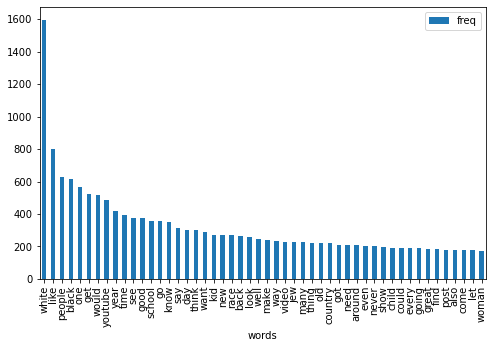

In [40]:
import matplotlib.pyplot as plt
mcw.plot(x="words", y="freq", kind="bar", figsize=(8,5))
plt.show()

In [43]:
data['tokens'] = data['text_clean'].apply(word_tokenize)

In [44]:
data

,file_id,user_id,subforum_id,num_contexts,label,text,text_clean,stemmed,lemmatized,sentiment_score,tokens
0,12834217_1,572066,1346,0,0,"As of March 13th , 2014 , the booklet had been...",march booklet downloaded times counting,march booklet download time count,march booklet downloaded time counting,0.0000,"[march, booklet, downloaded, times, counting]"
1,12834217_2,572066,1346,0,0,In order to help increase the booklets downloa...,order help increase booklets downloads would g...,order help increas booklet download would grea...,order help increase booklet downloads would gr...,1.0268,"[order, help, increase, booklets, downloads, w..."
2,12834217_3,572066,1346,0,0,( Simply copy and paste the following text int...,simply copy paste following text youtube video...,simpli copi past follow text youtub video desc...,simply copy paste following text youtube video...,0.0000,"[simply, copy, paste, following, text, youtube..."
3,12834217_4,572066,1346,0,1,Click below for a FREE download of a colorfull...,click free download colorfully illustrated pag...,click free download color illustr page e book ...,click free download colorfully illustrated pag...,-0.0161,"[click, free, download, colorfully, illustrate..."
4,12834217_5,572066,1346,0,0,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click download mb green banner link,click download mb green banner link,click download mb green banner link,0.0000,"[click, download, mb, green, banner, link]"
...,...,...,...,...,...,...,...,...,...,...,...
10921,33676864_5,734541,1388,0,0,"Billy - `` That guy would n't leave me alone ,...",billy guy would n leave alone gave trudeau salute,billi guy would n leav alon gave trudeau salut,billy guy would n leave alone gave trudeau salute,0.0000,"[billy, guy, would, n, leave, alone, gave, tru..."
10922,33677019_1,735154,1388,0,0,Wish we at least had a Marine Le Pen to vote f...,wish least marine le pen vote canada,wish least marin le pen vote canada,wish least marine le pen vote canada,0.4019,"[wish, least, marine, le, pen, vote, canada]"
10923,33677019_2,735154,1388,0,0,Its like the choices are white genocide candid...,like choices white genocide candidate,like choic white genocid candid,like choice white genocide candidate,0.3612,"[like, choices, white, genocide, candidate]"
10924,33677053_1,572266,1388,0,1,Why White people used to say that sex was a si...,white people used say sex sin used mystery saw...,white peopl use say sex sin use mysteri saw ch...,white people used say sex sin used mystery saw...,-0.5574,"[white, people, used, say, sex, sin, used, mys..."


In [35]:
# POS
from textblob import TextBlob
def pos_tag(text):
    try:
        return TextBlob(text).tags
    except:
        return None

In [47]:
from textblob import TextBlob
TextBlob(data.iloc[4]["text_clean"]).tags

[('click', 'NN'),
 ('download', 'NN'),
 ('mb', 'NN'),
 ('green', 'JJ'),
 ('banner', 'NN'),
 ('link', 'NN')]

In [49]:
TextBlob(data.iloc[4]["stemmed"]).tags

[('click', 'NN'),
 ('download', 'NN'),
 ('mb', 'NN'),
 ('green', 'JJ'),
 ('banner', 'NN'),
 ('link', 'NN')]

In [51]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [53]:
data['POS_spacy'] = data['text_clean'].apply(lambda x: [(token.text, token.pos_) for token in nlp(x)])

In [54]:
data.iloc[4]["POS_spacy"]

[('click', 'VERB'),
 ('download', 'PROPN'),
 ('mb', 'PROPN'),
 ('green', 'ADJ'),
 ('banner', 'NOUN'),
 ('link', 'NOUN')]

In [56]:
all_pos = data['POS_spacy'].sum()

In [58]:
all_adjs = [x[0] for x in all_pos if x[1] == "ADJ"]

In [60]:
all_nouns = [x[0] for x in all_pos if x[1] == "NOUN"]

In [61]:
adj_counter = {}
for word in all_adjs:
    if word in adj_counter:
        adj_counter[word] += 1
    else:
        adj_counter[word] = 1
            
popular_adj = sorted(adj_counter, key = adj_counter.get, reverse = True)
top_20_adj = popular_adj[:20]
top_20_adj

['white',
 'black',
 'good',
 'many',
 'old',
 'new',
 'last',
 'great',
 'non',
 'little',
 'much',
 'bad',
 'free',
 'right',
 'big',
 'next',
 'high',
 'different',
 'first',
 'long']

In [62]:
noun_counter = {}
for word in all_nouns:
    if word in noun_counter:
        noun_counter[word] += 1
    else:
        noun_counter[word] = 1
            
popular_noun = sorted(noun_counter, key = noun_counter.get, reverse = True)
top_20_noun = popular_noun[:20]
top_20_noun

['people',
 'whites',
 'time',
 'race',
 'school',
 'years',
 'year',
 'kids',
 'blacks',
 'day',
 'country',
 'way',
 'video',
 'thing',
 'thread',
 'children',
 'world',
 'area',
 'man',
 'person']

In [71]:
hate = data.loc[data["label"] == 1]

In [74]:
all_pos_hate = hate['POS_spacy'].sum()

In [78]:
all_adjs_hate = [x[0] for x in all_pos_hate if x[1] == "ADJ"]
all_nouns_hate = [x[0] for x in all_pos_hate if x[1] == "NOUN"]

In [79]:
adj_counter1 = {}
for word in all_adjs_hate:
    if word in adj_counter1:
        adj_counter1[word] += 1
    else:
        adj_counter1[word] = 1
            
popular_adj1 = sorted(adj_counter1, key = adj_counter1.get, reverse = True)
top_20_adj1 = popular_adj1[:20]
top_20_adj1

['white',
 'black',
 'non',
 'good',
 'many',
 'last',
 'little',
 'much',
 'negro',
 'bad',
 'great',
 'jewish',
 'asian',
 'old',
 'new',
 'poor',
 'dumb',
 'wrong',
 'real',
 'liberal']

In [80]:
noun_counter1 = {}
for word in all_nouns_hate:
    if word in noun_counter1:
        noun_counter1[word] += 1
    else:
        noun_counter1[word] = 1
            
popular_noun1 = sorted(noun_counter1, key = noun_counter1.get, reverse = True)
top_20_noun1 = popular_noun1[:20]
top_20_noun1

['whites',
 'people',
 'blacks',
 'race',
 'country',
 'time',
 'kids',
 'school',
 'women',
 'way',
 'children',
 'negroes',
 'countries',
 'thing',
 'world',
 'day',
 'years',
 'place',
 'things',
 'crime']

In [81]:
top_adj = {"Total": top_20_adj, "Hate Speech": top_20_adj1}
top_adj = pd.DataFrame(top_adj)
top_adj

,Total,Hate Speech
0,white,white
1,black,black
2,good,non
3,many,good
4,old,many
5,new,last
6,last,little
7,great,much
8,non,negro
9,little,bad


In [36]:
data['POS'] = data['lemmatized'].apply(pos_tag)

In [70]:
def get_adjectives(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag == "JJ" or tag == "JJR" or tag == "JJS"]

data['ADJ'] = data['lemmatized'].apply(get_adjectives)

In [38]:
adj = data['lemmatized'].apply(get_adjectives)
adj

0                                                       []
1                                            [great, text]
2                                                   [copy]
3        [click, free, illustrated, e, intentional, wes...
4                                                  [green]
                               ...                        
10921                                            [trudeau]
10922                           [wish, least, marine, pen]
10923                                              [white]
10924                         [white, child, brown, mixed]
10925                                                   []
Name: lemmatized, Length: 10926, dtype: object

In [39]:
adj_list = [j for i in adj for j in i]
adj_list

['great',
 'text',
 'copy',
 'click',
 'free',
 'illustrated',
 'e',
 'intentional',
 'western',
 'green',
 'western',
 'white',
 'yt',
 'txt',
 'interested',
 'spread',
 'copy',
 'info',
 'stupid',
 'black',
 'alongside',
 'white',
 'dirty',
 'graphic',
 'official',
 'white',
 'higher',
 'white',
 'free',
 'latest',
 'write',
 'neighbourhood',
 'sad',
 'white',
 'right',
 'young',
 'angry',
 'favorite',
 'old',
 'many',
 'national',
 'geographic',
 'early',
 'replete',
 'african',
 'albert',
 'documentary',
 'available',
 'pale',
 'suppose',
 'n',
 'cultural',
 'girl',
 'guy',
 'middle',
 'lip',
 'bad',
 'whole',
 'bizarre',
 'supporter',
 'sound',
 'israeli',
 'know',
 'many',
 'israel',
 'give',
 'u',
 'fox',
 'israel',
 'possible',
 'free',
 'particular',
 'perfect',
 'start',
 'national',
 'political',
 'free',
 'first',
 'n',
 'long',
 'pathetic',
 'little',
 'innocent',
 'white',
 'white',
 'gm',
 'entire',
 'ok',
 'free',
 'informative',
 'intentional',
 'white',
 'wntube',
 'n

In [40]:
# https://stackoverflow.com/questions/3594514/how-to-find-most-common-elements-of-a-list
adj_counter = {}
for word in adj_list:
    if word in adj_counter:
        adj_counter[word] += 1
    else:
        adj_counter[word] = 1
            
popular_adj = sorted(adj_counter, key = adj_counter.get, reverse = True)
top_20_adj = popular_adj[:20]
top_20_adj

['white',
 'black',
 'good',
 'new',
 'u',
 'n',
 'many',
 'old',
 'great',
 'last',
 'live',
 'much',
 'little',
 'american',
 'free',
 'asian',
 'bad',
 'irish',
 'non',
 'sure']

In [69]:
def get_noun(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag == "NN" or tag == "NNS" or tag == "NNP" or tag == "NNPS"]

data['NOUN'] = data['lemmatized'].apply(get_noun)

In [42]:
noun = data['lemmatized'].apply(get_noun)
noun_list = [j for i in noun for j in i]
noun_counter = {}
for word in noun_list:
    if word in noun_counter:
        noun_counter[word] += 1
    else:
        noun_counter[word] = 1
            
popular_noun = sorted(noun_counter, key = noun_counter.get, reverse = True)
top_20_noun = popular_noun[:20]
top_20_noun

['people',
 'year',
 'youtube',
 'time',
 'school',
 'day',
 'race',
 'way',
 'thing',
 'country',
 'kid',
 'video',
 'jew',
 'n',
 'woman',
 'anyone',
 'show',
 'look',
 'home',
 'post']

In [43]:
data

,file_id,user_id,subforum_id,num_contexts,label,text,text_clean,stemmed,lemmatized,sentiment_score,tokens,POS,ADJ,NOUN
0,12834217_1,572066,1346,0,0,"As of March 13th , 2014 , the booklet had been...",march booklet downloaded times counting,march booklet download time count,march booklet downloaded time counting,0.0000,"[march, booklet, downloaded, times, counting]","[(march, NN), (booklet, NN), (downloaded, VBD)...",[],"[march, booklet, time, counting]"
1,12834217_2,572066,1346,0,0,In order to help increase the booklets downloa...,order help increase booklets downloads would g...,order help increas booklet download would grea...,order help increase booklet downloads would gr...,1.0268,"[order, help, increase, booklets, downloads, w...","[(order, NN), (help, NN), (increase, VB), (boo...","[great, text]","[order, help, booklet, downloads, stormfronter..."
2,12834217_3,572066,1346,0,0,( Simply copy and paste the following text int...,simply copy paste following text youtube video...,simpli copi past follow text youtub video desc...,simply copy paste following text youtube video...,0.0000,"[simply, copy, paste, following, text, youtube...","[(simply, RB), (copy, JJ), (paste, NN), (follo...",[copy],"[paste, text, youtube, video, description, box]"
3,12834217_4,572066,1346,0,1,Click below for a FREE download of a colorfull...,click free download colorfully illustrated pag...,click free download color illustr page e book ...,click free download colorfully illustrated pag...,-0.0161,"[click, free, download, colorfully, illustrate...","[(click, JJ), (free, JJ), (download, NN), (col...","[click, free, illustrated, e, intentional, wes...","[download, page, book, zionist, destruction, c..."
4,12834217_5,572066,1346,0,0,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click download mb green banner link,click download mb green banner link,click download mb green banner link,0.0000,"[click, download, mb, green, banner, link]","[(click, NN), (download, NN), (mb, NN), (green...",[green],"[click, download, mb, banner, link]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10921,33676864_5,734541,1388,0,0,"Billy - `` That guy would n't leave me alone ,...",billy guy would n leave alone gave trudeau salute,billi guy would n leav alon gave trudeau salut,billy guy would n leave alone gave trudeau salute,0.0000,"[billy, guy, would, n, leave, alone, gave, tru...","[(billy, RB), (guy, NN), (would, MD), (n, VB),...",[trudeau],"[guy, salute]"
10922,33677019_1,735154,1388,0,0,Wish we at least had a Marine Le Pen to vote f...,wish least marine le pen vote canada,wish least marin le pen vote canada,wish least marine le pen vote canada,0.4019,"[wish, least, marine, le, pen, vote, canada]","[(wish, JJ), (least, JJS), (marine, JJ), (le, ...","[wish, least, marine, pen]","[le, vote, canada]"
10923,33677019_2,735154,1388,0,0,Its like the choices are white genocide candid...,like choices white genocide candidate,like choic white genocid candid,like choice white genocide candidate,0.3612,"[like, choices, white, genocide, candidate]","[(like, IN), (choice, NN), (white, JJ), (genoc...",[white],"[choice, genocide, candidate]"
10924,33677053_1,572266,1388,0,1,Why White people used to say that sex was a si...,white people used say sex sin used mystery saw...,white peopl use say sex sin use mysteri saw ch...,white people used say sex sin used mystery saw...,-0.5574,"[white, people, used, say, sex, sin, used, mys...","[(white, JJ), (people, NNS), (used, VBN), (say...","[white, child, brown, mixed]","[people, sex, sin, mystery, race, child]"


In [1]:
data['tk'] = data['text_clean'].apply(lambda x: word_tokenize(x))
nouns = []
for sentence in tokens:
     for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
        if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
             nouns.append(word)

NameError: name 'data' is not defined

In [45]:
nouns

["'march",
 "'booklet",
 "'times",
 ']',
 "'order",
 "'increase",
 "'booklets",
 "'downloads",
 "'great",
 "'stormfronters",
 "'youtube",
 "'accounts",
 "'description",
 "'boxes",
 "'youtube",
 ']',
 "'simply",
 "'youtube",
 "'videos",
 "'description",
 "'boxes",
 ']',
 "'click",
 "'page",
 'e',
 "'book",
 "'intentional",
 "'destruction",
 "'western",
 "'civilization",
 ']',
 "'click",
 "'mb",
 "'banner",
 ']',
 "'booklet",
 ']',
 "'downloads",
 ']',
 "'pdf",
 "'docx",
 "'video",
 "'version",
 "'western",
 "'civilization",
 "'white",
 "'yt",
 "'comment",
 "'txt",
 "'txt",
 "'www",
 "'youtube",
 "'com",
 'v',
 "'hg",
 "'alpm",
 "'booklet",
 "'link",
 "'world",
 ']',
 "'simply",
 "'links",
 "'paste",
 "'description",
 "'box",
 "'youtube",
 ']',
 "'thank",
 "'advance",
 "'youtube",
 "'description",
 "'box",
 "'info",
 "'info",
 ']',
 '[',
 "'may",
 "'jew",
 "'stupid",
 "'seems",
 "'blacks",
 "'wo",
 "'kill",
 "'alongside",
 "'every",
 "'white",
 "'get",
 ']',
 "'thank",
 "'info",
 ']',
 "

In [46]:
tokens = nltk.word_tokenize(str(data['text_clean']))
tagged = nltk.pos_tag(tokens)
print(tagged)

[('0', 'CD'), ('march', 'JJ'), ('booklet', 'NN'), ('downloaded', 'VBD'), ('times', 'NNS'), ('counting', 'VBG'), ('1', 'CD'), ('order', 'NN'), ('help', 'NN'), ('increase', 'VB'), ('booklets', 'NNS'), ('downloads', 'NNS'), ('would', 'MD'), ('g', 'VB'), ('...', ':'), ('2', 'CD'), ('simply', 'RB'), ('copy', 'JJ'), ('paste', 'NN'), ('following', 'VBG'), ('text', 'NN'), ('youtube', 'NN'), ('video', 'NN'), ('...', ':'), ('3', 'CD'), ('click', 'JJ'), ('free', 'JJ'), ('download', 'NN'), ('colorfully', 'RB'), ('illustrated', 'VBD'), ('pag', 'NN'), ('...', ':'), ('4', 'CD'), ('click', 'NN'), ('download', 'NN'), ('mb', 'NN'), ('green', 'JJ'), ('banner', 'NN'), ('link', 'NN'), ('...', ':'), ('10921', 'CD'), ('billy', 'RB'), ('guy', 'NN'), ('would', 'MD'), ('n', 'VB'), ('leave', 'VB'), ('alone', 'RB'), ('gave', 'VBD'), ('trudeau', 'JJ'), ('salute', 'NN'), ('10922', 'CD'), ('wish', 'JJ'), ('least', 'JJS'), ('marine', 'JJ'), ('le', 'NN'), ('pen', 'JJ'), ('vote', 'NN'), ('canada', 'VBD'), ('10923', 'CD

In [47]:
pd.set_option('display.max_colwidth', None)
data['text'][0:10]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              As of March 13th , 2014 , the booklet had been downloaded over 18,300 times and counting .
1                                                                                                                             

In [48]:
# Label (0,1)

In [49]:
data.loc[data['label'] == 1].shape # 1428 over 10926 rows

(1428, 14)

In [65]:
hate = data.loc[data['label'] == 1]

In [66]:
common_words = get_top_n_words(hate['lemmatized'], 50)
for word, freq in common_words:
    print(word,freq)

white 400
black 217
like 132
jew 117
people 106
would 94
negro 94
race 88
one 87
get 86
country 71
see 71
think 65
go 63
non 58
want 56
back 53
time 52
school 49
woman 48
even 48
make 47
asian 47
look 46
know 46
thing 45
way 45
kid 44
say 44
good 44
every 43
day 42
never 41
child 41
need 40
come 38
africa 38
liberal 37
ape 36
world 36
many 36
around 36
going 35
youtube 33
year 32
last 32
got 32
find 32
much 31
scum 31


In [67]:
adj1 = hate['lemmatized'].apply(get_adjectives)
adj_list1 = [j for i in adj1 for j in i]
adj_counter1 = {}
for word in adj_list1:
    if word in adj_counter1:
        adj_counter1[word] += 1
    else:
        adj_counter1[word] = 1
            
popular_adj1 = sorted(adj_counter1, key = adj_counter1.get, reverse = True)
top_20_adj1 = popular_adj1[:20]
top_20_adj1

NameError: name 'get_adjectives' is not defined

In [68]:
noun1 = hate['lemmatized'].apply(get_noun)
noun_list1 = [j for i in noun1 for j in i]
noun_counter1 = {}
for word in noun_list1:
    if word in noun_counter1:
        noun_counter1[word] += 1
    else:
        noun_counter1[word] = 1
            
popular_noun1 = sorted(noun_counter1, key = noun_counter1.get, reverse = True)
top_20_noun1 = popular_noun1[:20]
top_20_noun1

NameError: name 'get_noun' is not defined

In [54]:
top_adj = {"Total": top_20_adj, "Hate Speech": top_20_adj1}
top_adj = pd.DataFrame(top_adj)
top_adj

,Total,Hate Speech
0,white,white
1,black,black
2,good,n
3,new,u
4,u,good
5,n,asian
6,many,non
7,old,many
8,great,liberal
9,last,negro


In [55]:
top_noun = {"Total": top_20_noun, "Hate Speech": top_20_noun1}
top_noun = pd.DataFrame(top_noun)
top_noun

,Total,Hate Speech
0,people,people
1,year,jew
2,youtube,race
3,time,country
4,school,time
5,day,school
6,race,woman
7,way,thing
8,thing,way
9,country,day
